In [28]:
options(scipen = 999)
# Libraries to be used in this code #
library(dplyr)
library(rpart)
library(party)
library(tree)
library(caTools)


In [1]:
###===Importing Data-Set===###
realestate<-read.csv("F:\\melb.realstate.all.files\\InputDatasets\\realestate.derived.without.year.csv", header = T, stringsAsFactors = T, strip.white = T, sep = ',')
str(realestate)


'data.frame':	8216 obs. of  22 variables:
 $ Suburb      : Factor w/ 140 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address     : Factor w/ 8120 levels "1 Adelle Ct",..: 5931 1212 3285 4434 6065 5513 5534 5640 5837 3264 ...
 $ Rooms       : int  3 3 4 4 3 3 3 3 3 3 ...
 $ Type        : Factor w/ 3 levels "h","t","u": 1 1 1 1 1 1 1 1 1 1 ...
 $ Price       : int  1447500 1876000 1985000 1330000 1465000 850000 1350000 1200000 1195000 1165000 ...
 $ Method      : Factor w/ 5 levels "PI","S","SA",..: 1 2 2 1 4 1 5 2 4 2 ...
 $ SellerG     : Factor w/ 178 levels "Abercromby's",..: 111 111 18 87 18 18 111 83 83 83 ...
 $ Date        : Factor w/ 42 levels "03-09-16","03-12-16",..: 31 8 17 25 4 4 17 23 37 41 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  3 4 4 4 3 3 3 3 3 3 ...
 $ Bathroom    : int  3 2 2 2 2 2 2 2 2 2 ...
 $ Car         : int  1 0 1 2 0

In [3]:
# Converting continous data into categorical #
realestate$Postcode<-as.factor(realestate$Postcode)
realestate$Rooms<-as.factor(realestate$Rooms)
realestate$Bedroom2<-as.factor(realestate$Bedroom2)
realestate$Bathroom<-as.factor(realestate$Bathroom)
realestate$Car<-as.factor(realestate$Car)
realestate$Type<-as.factor(realestate$Type)


In [4]:
names(realestate)

[1] "Suburb"       "Address"      "Rooms"        "Type"         "Price"       
 [6] "Method"       "SellerG"      "Date"         "Distance"     "Postcode"    
[11] "Bedroom2"     "Bathroom"     "Car"          "Landsize"     "BuildingArea"
[16] "CouncilArea"  "Lattitude"    "Longtitude"   "Days.diff"    "Dist.bucket" 
[21] "Price.bucket" "Months"

In [5]:
# creating a subset for analysing d.tree for Price#
## Removing Address, Date, Lattitude, Longtitude, Dist.bucket, Price.bucket and Months ##
realestate.tree.price<- realestate[-c(2,8,17,18,20,21,22)]
str(realestate.tree.price)


'data.frame':	8216 obs. of  15 variables:
 $ Suburb      : Factor w/ 140 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Rooms       : Factor w/ 8 levels "1","2","3","4",..: 3 3 4 4 3 3 3 3 3 3 ...
 $ Type        : Factor w/ 3 levels "h","t","u": 1 1 1 1 1 1 1 1 1 1 ...
 $ Price       : int  1447500 1876000 1985000 1330000 1465000 850000 1350000 1200000 1195000 1165000 ...
 $ Method      : Factor w/ 5 levels "PI","S","SA",..: 1 2 2 1 4 1 5 2 4 2 ...
 $ SellerG     : Factor w/ 178 levels "Abercromby's",..: 111 111 18 87 18 18 111 83 83 83 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : Factor w/ 92 levels "3000","3002",..: 38 38 38 38 38 38 38 38 38 38 ...
 $ Bedroom2    : Factor w/ 9 levels "0","1","2","3",..: 4 5 5 5 4 4 4 4 4 4 ...
 $ Bathroom    : Factor w/ 7 levels "0","1","2","3",..: 4 3 3 3 3 3 3 3 3 3 ...
 $ Car         : Factor w/ 9 levels "0","1","2","3",..: 2 1 2 3 1 2 3 2 2 1 ...
 $ Landsize    : num  166 245 194 780 134

In [7]:
# Modeling D.tree for predicting Price using rpart #
re.tree.price<-rpart::rpart(Price ~ Rooms+Type+Landsize+Bathroom+CouncilArea+Distance, data = realestate.tree.price, control = rpart.control(minsplit = 20, cp = 0.01,maxcompete = 4, xval = 10, surrogatestyle = 0, maxdepth = 30))
print(re.tree.price)

n= 8216 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 8216 3826441000000000 1205918.0  
   2) CouncilArea=Banyule,Brimbank,Darebin,Glen Eira,Hobsons Bay,Hume,Kingston,Manningham,Maribyrnong,Melbourne,Monash,Moonee Valley,Moreland,Whitehorse,Yarra 6153 1243011000000000 1012182.0  
     4) Rooms=1,2,3 4641  594254700000000  909129.8  
       8) Type=t,u 1077   55670810000000  676975.6 *
       9) Type=h 3564  462997600000000  979284.2  
        18) CouncilArea=Banyule,Brimbank,Darebin,Hobsons Bay,Hume,Kingston,Maribyrnong,Moonee Valley,Moreland 2636  234623600000000  887545.1  
          36) Distance>=9.15 1388   62570460000000  742122.8 *
          37) Distance< 9.15 1248  110054400000000 1049281.0 *
        19) CouncilArea=Glen Eira,Manningham,Melbourne,Monash,Whitehorse,Yarra 928  143173100000000 1239871.0 *
     5) Rooms=4,5,6,7,8 1512  448186900000000 1328497.0  
      10) CouncilArea=Brimbank,Hume,Kingston,Maribyrnong,Moreland 387   49008270000000 100621

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

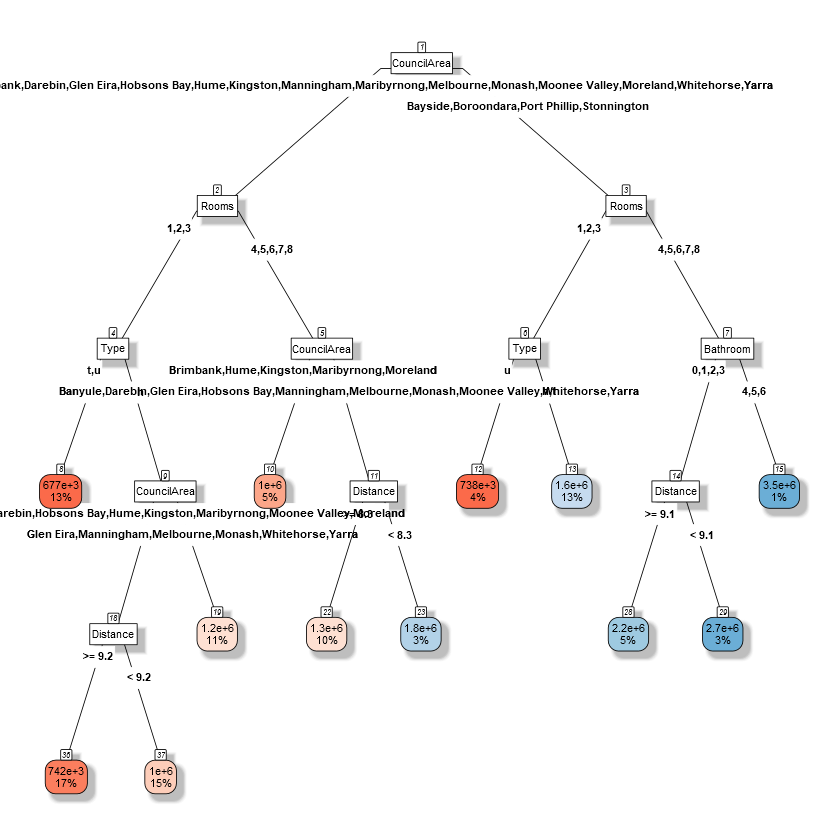

In [8]:
## Plotiing D.Tress #
rpart.plot::rpart.plot(re.tree.price, type = 5, box.palette="RdBu", shadow.col="gray", nn=TRUE, fallen.leaves = FALSE, cex = 0.5)

In [9]:
# Slicing Price to check the Prediction #
ac.price<-realestate.tree.price[,4]
df<-realestate.tree.price[,-4]
pred.price<-predict(re.tree.price,df)

In [10]:
# Checking for Accuracy #
org.vs.pred<-cbind(orginal=ac.price,predicted=pred.price)

min.max.accuracy<-mean(apply(org.vs.pred, 1, min) / apply(org.vs.pred, 1, max));min.max.accuracy

mape<-mean(abs((org.vs.pred[,2] - org.vs.pred[,1]))/org.vs.pred[,1]);mape

[1] 0.7998204

[1] 0.2600129

In [11]:
# Creating a subset for analysing D.Tree for Type #
names(realestate)

[1] "Suburb"       "Address"      "Rooms"        "Type"         "Price"       
 [6] "Method"       "SellerG"      "Date"         "Distance"     "Postcode"    
[11] "Bedroom2"     "Bathroom"     "Car"          "Landsize"     "BuildingArea"
[16] "CouncilArea"  "Lattitude"    "Longtitude"   "Days.diff"    "Dist.bucket" 
[21] "Price.bucket" "Months"

In [12]:
# Removing Address, Date, Lattitude, Longitude, Dist.bucket and Price.bucket #
realestate.tree.type<- realestate[-c(2,8,17,18,20,21)]
str(realestate.tree.type)

'data.frame':	8216 obs. of  16 variables:
 $ Suburb      : Factor w/ 140 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Rooms       : Factor w/ 8 levels "1","2","3","4",..: 3 3 4 4 3 3 3 3 3 3 ...
 $ Type        : Factor w/ 3 levels "h","t","u": 1 1 1 1 1 1 1 1 1 1 ...
 $ Price       : int  1447500 1876000 1985000 1330000 1465000 850000 1350000 1200000 1195000 1165000 ...
 $ Method      : Factor w/ 5 levels "PI","S","SA",..: 1 2 2 1 4 1 5 2 4 2 ...
 $ SellerG     : Factor w/ 178 levels "Abercromby's",..: 111 111 18 87 18 18 111 83 83 83 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : Factor w/ 92 levels "3000","3002",..: 38 38 38 38 38 38 38 38 38 38 ...
 $ Bedroom2    : Factor w/ 9 levels "0","1","2","3",..: 4 5 5 5 4 4 4 4 4 4 ...
 $ Bathroom    : Factor w/ 7 levels "0","1","2","3",..: 4 3 3 3 3 3 3 3 3 3 ...
 $ Car         : Factor w/ 9 levels "0","1","2","3",..: 2 1 2 3 1 2 3 2 2 1 ...
 $ Landsize    : num  166 245 194 780 134

In [13]:
## Modeling D.tree for predicting Price using rpart ##
re.tree.type<-party::ctree(Type~Price+BuildingArea+Rooms+CouncilArea+Landsize+Bathroom, data = realestate.tree.type)
print(re.tree.type)


	 Conditional inference tree with 75 terminal nodes

Response:  Type 
Inputs:  Price, BuildingArea, Rooms, CouncilArea, Landsize, Bathroom 
Number of observations:  8216 

1) Rooms == {1, 2, 8}; criterion = 1, statistic = 1837.748
  2) Price <= 755000; criterion = 1, statistic = 484.123
    3) CouncilArea == {Bayside, Boroondara, Glen Eira, Kingston, Melbourne, Moonee Valley, Port Phillip, Stonnington, Whitehorse, Yarra}; criterion = 1, statistic = 280.347
      4) BuildingArea <= 132; criterion = 1, statistic = 154.78
        5) Price <= 667000; criterion = 1, statistic = 43.191
          6) Bathroom == {1}; criterion = 0.995, statistic = 30.778
            7)*  weights = 279 
          6) Bathroom == {2}
            8) BuildingArea <= 94; criterion = 0.998, statistic = 16.134
              9)*  weights = 19 
            8) BuildingArea > 94
              10)*  weights = 8 
        5) Price > 667000
          11) CouncilArea == {Glen Eira, Kingston, Melbourne, Moonee Valley, Yarra}; 

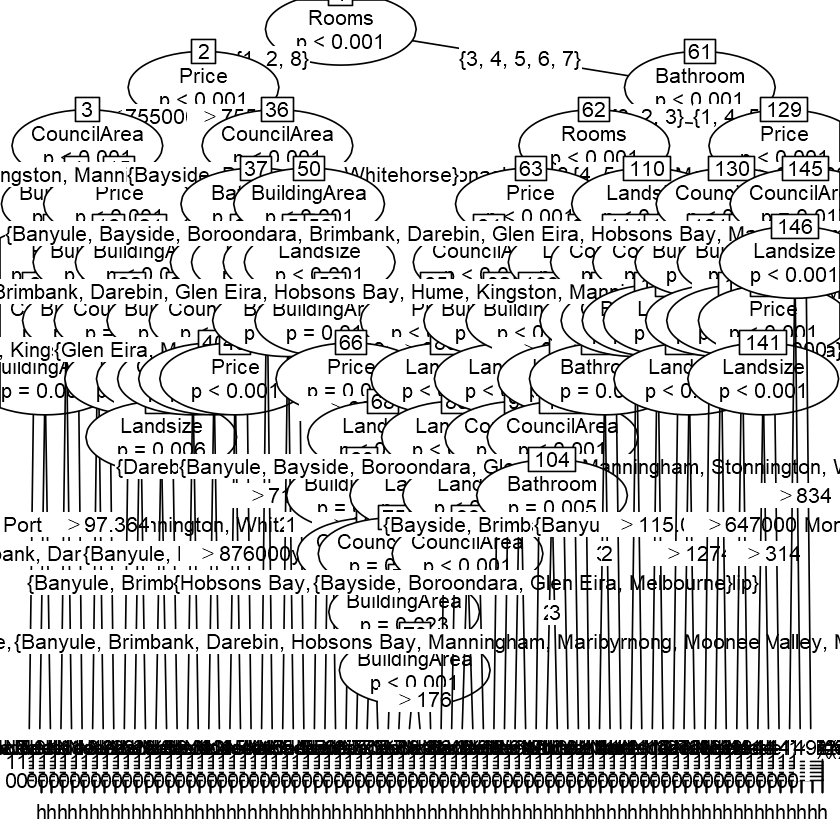

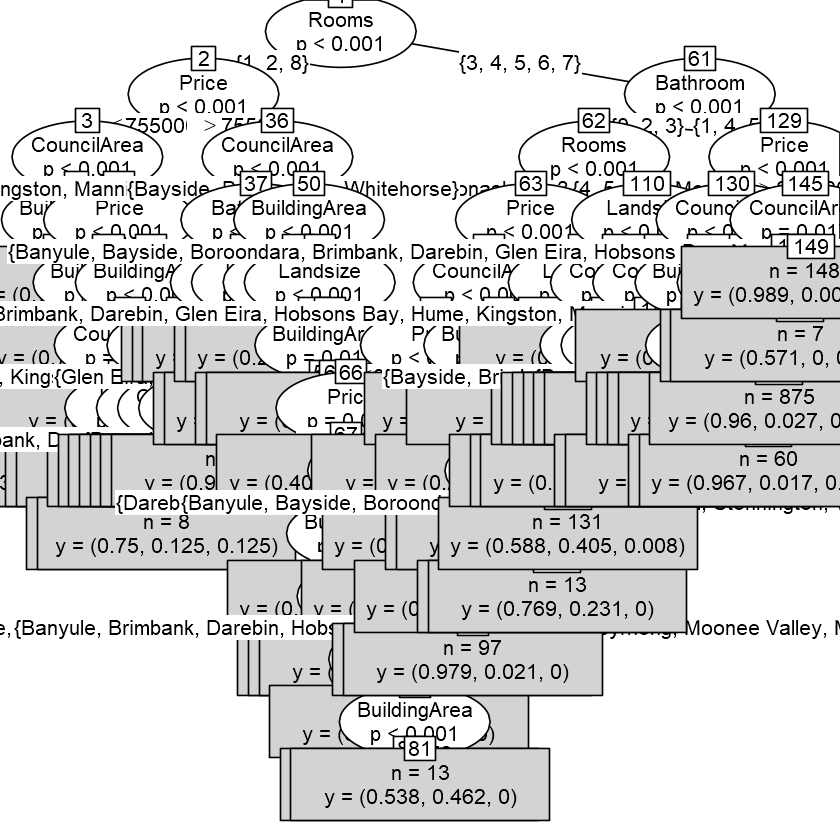

In [14]:
## Plotting D.Tress with Type ##
plot(re.tree.type)
plot(re.tree.type, type = "simple")

In [15]:
## Modeling D.tree for predicting Price using party ##
re.tree.type<-party::ctree(Type~Price+BuildingArea+Rooms+CouncilArea+Landsize+Bathroom, data = realestate.tree.type)
print(re.tree.type)


	 Conditional inference tree with 75 terminal nodes

Response:  Type 
Inputs:  Price, BuildingArea, Rooms, CouncilArea, Landsize, Bathroom 
Number of observations:  8216 

1) Rooms == {1, 2, 8}; criterion = 1, statistic = 1837.748
  2) Price <= 755000; criterion = 1, statistic = 484.123
    3) CouncilArea == {Bayside, Boroondara, Glen Eira, Kingston, Melbourne, Moonee Valley, Port Phillip, Stonnington, Whitehorse, Yarra}; criterion = 1, statistic = 280.347
      4) BuildingArea <= 132; criterion = 1, statistic = 154.78
        5) Price <= 667000; criterion = 1, statistic = 43.191
          6) Bathroom == {1}; criterion = 0.995, statistic = 30.778
            7)*  weights = 279 
          6) Bathroom == {2}
            8) BuildingArea <= 94; criterion = 0.998, statistic = 16.134
              9)*  weights = 19 
            8) BuildingArea > 94
              10)*  weights = 8 
        5) Price > 667000
          11) CouncilArea == {Glen Eira, Kingston, Melbourne, Moonee Valley, Yarra}; 

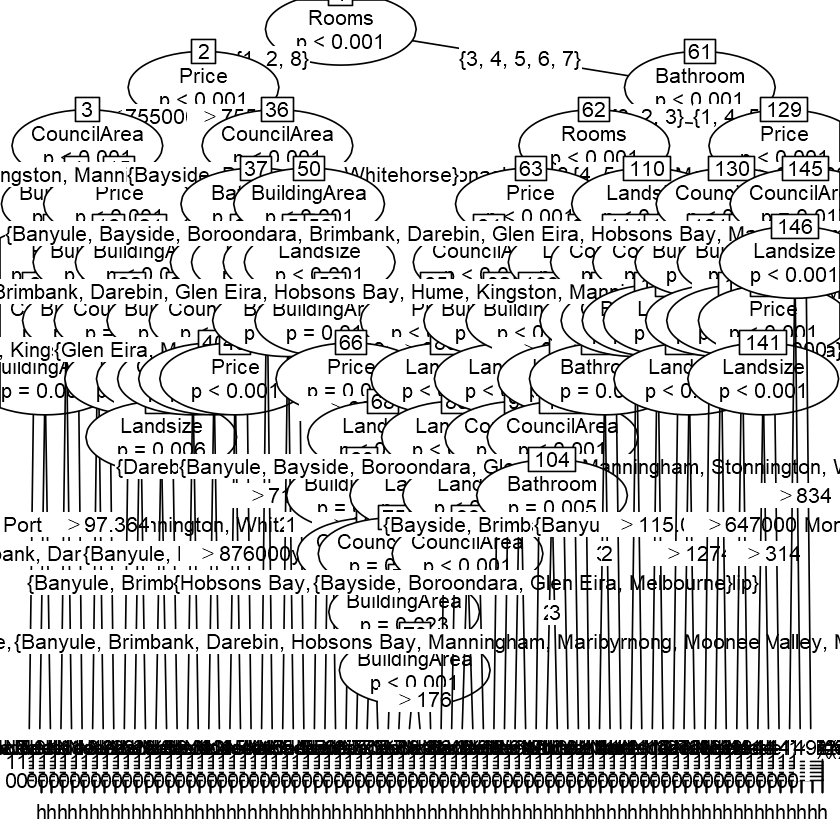

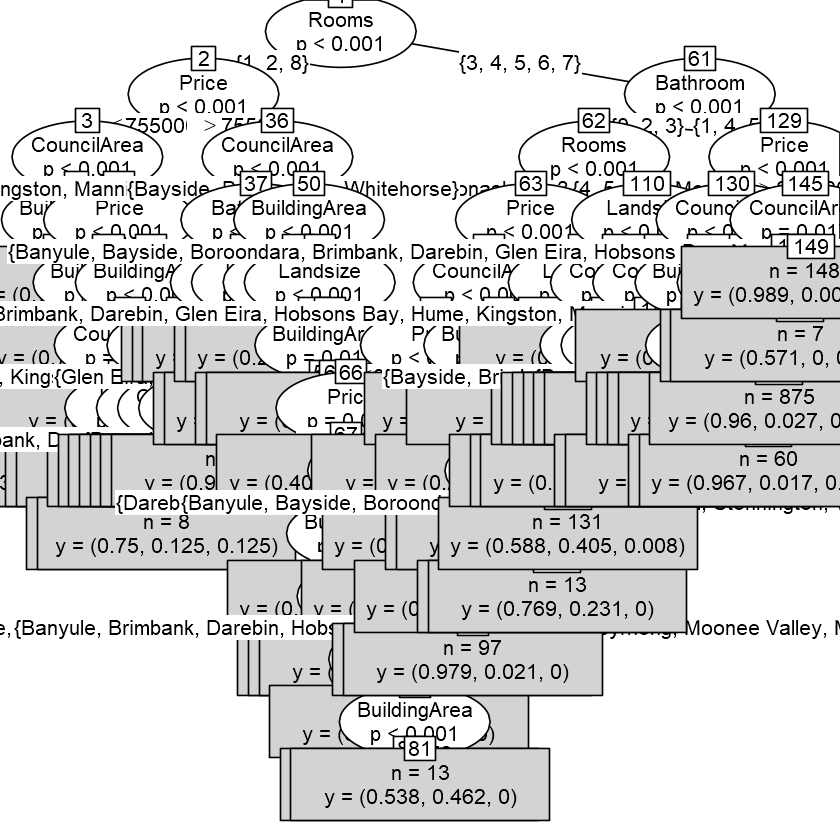

In [16]:
## Plotting D.Tree with Type ##
plot(re.tree.type)
plot(re.tree.type, type = "simple")

In [17]:
## Modeling D.tree for predicting Price using tree library ##
levels(realestate.tree.type$CouncilArea)<-c(1:19)
realestate.tree.type$CouncilArea<-as.numeric(realestate.tree.type$CouncilArea)
re.tree.type.t<-tree::tree(Type~Price+CouncilArea, data = realestate.tree.type)
summary(re.tree.type.t)


Classification tree:
tree::tree(formula = Type ~ Price + CouncilArea, data = realestate.tree.type)
Number of terminal nodes:  7 
Residual mean deviance:  0.9807 = 8051 / 8209 
Misclassification error rate: 0.1654 = 1359 / 8216 

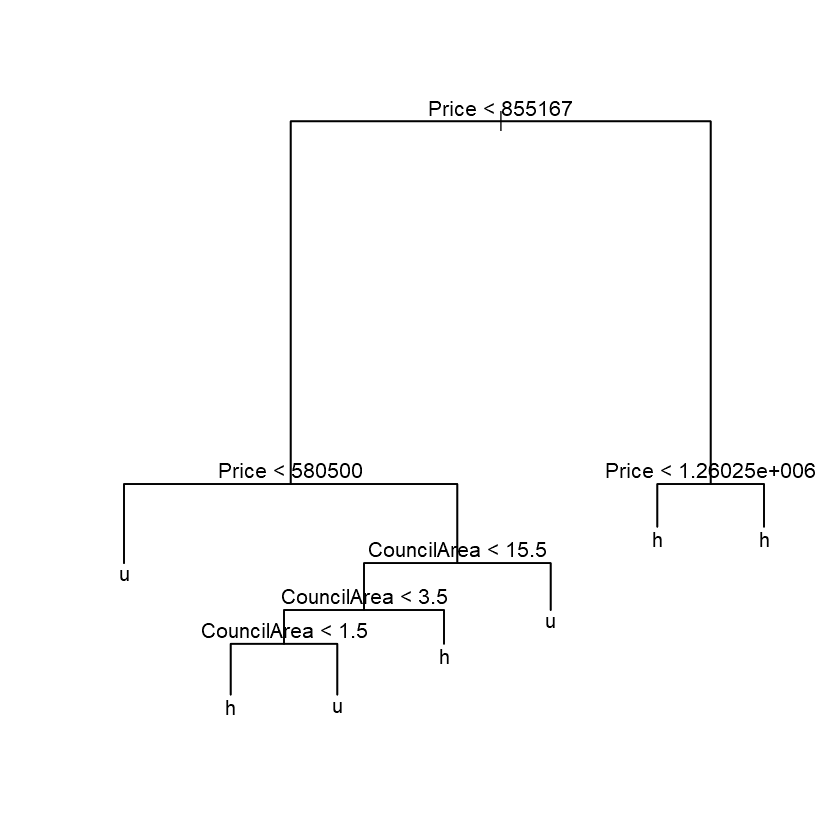

In [18]:
plot(re.tree.type.t)
text(re.tree.type.t)
#plot(re.tree.type, type = "simple")


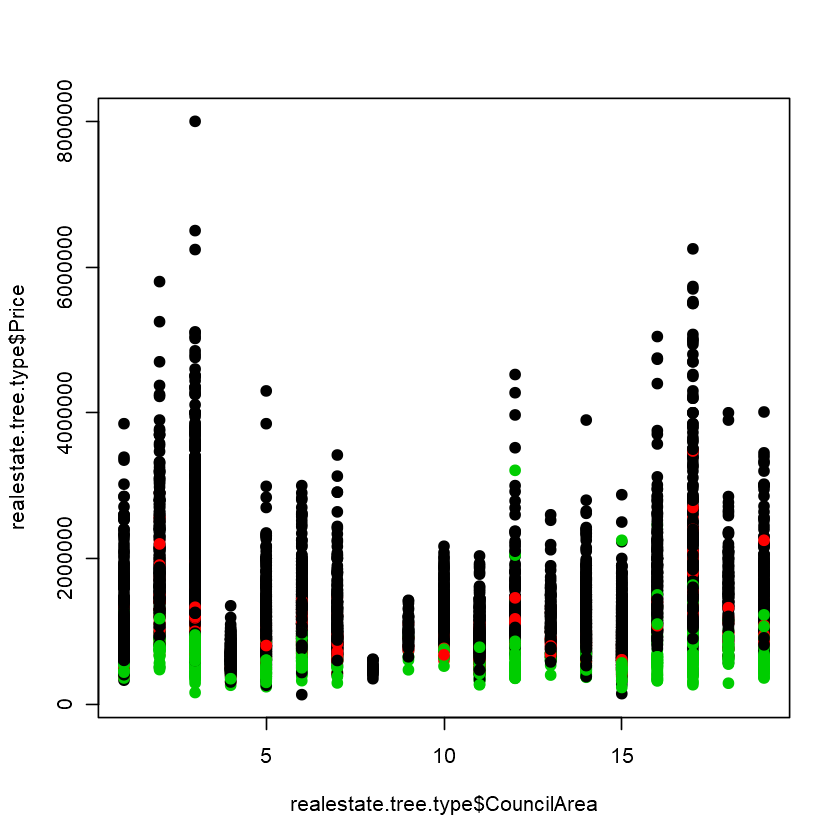

In [21]:
## Plotting the levels in Type ##
plot(realestate.tree.type$CouncilArea,realestate.tree.type$Price,pch=19,col=as.numeric(realestate.tree.type$Type))
partition.tree(re.tree.type.t,label="Type",add=TRUE)
legend(8000000,80000,legend=unique(realestate.tree.type$Type),col=unique(as.numeric(realestate.tree.type$Type)),pch=19)


In [22]:
# Looking for a better Tree Model for Type using tree lib #
re.tree.type.bt<-tree::tree(Type~Price+BuildingArea+Rooms+Landsize+Bathroom+CouncilArea+Distance
, data = realestate.tree.type)
summary(re.tree.type.bt)


Classification tree:
tree::tree(formula = Type ~ Price + BuildingArea + Rooms + Landsize + 
    Bathroom + CouncilArea + Distance, data = realestate.tree.type)
Variables actually used in tree construction:
[1] "BuildingArea" "Price"        "Rooms"        "Landsize"     "Distance"    
Number of terminal nodes:  9 
Residual mean deviance:  0.6957 = 5709 / 8207 
Misclassification error rate: 0.1282 = 1053 / 8216 

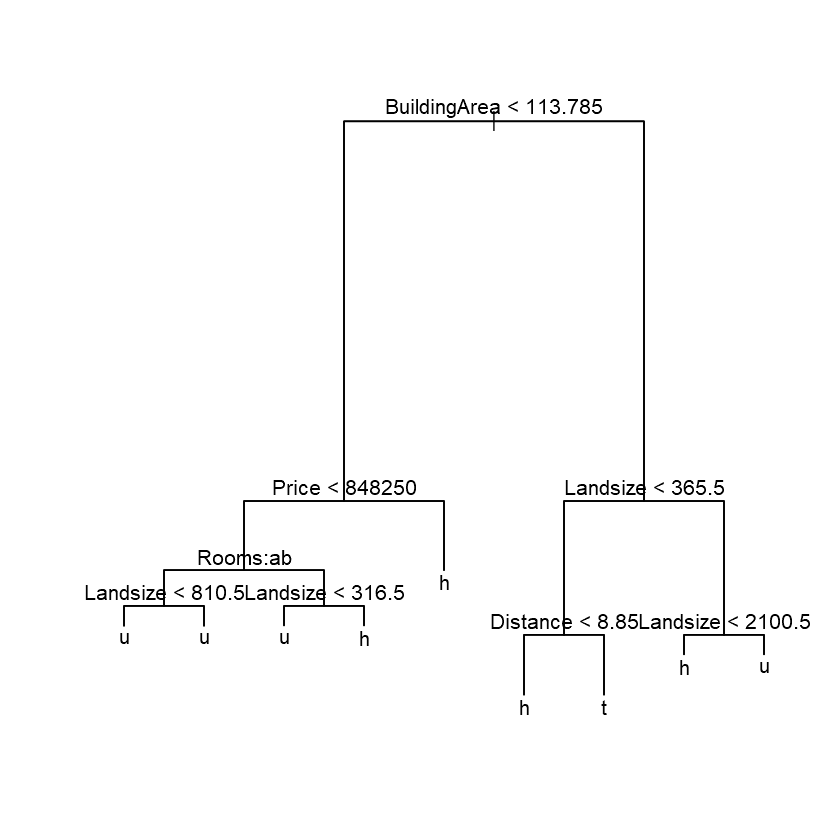

In [23]:
# Plotting D.Tree using Tree library#
plot(re.tree.type.bt)
text(re.tree.type.bt)


In [25]:
# Modeling D.tree for predicting Price.Bucket using rpart #
realestate.tree.pb<- realestate[-c(2,5,8,17,18,20,22)]
re.tree.pb<-rpart::rpart(Price.bucket ~ Rooms+Type+Landsize+Bathroom+CouncilArea+Distance, data = realestate.tree.pb, control = rpart.control(minsplit = 20, cp = 0.01,maxcompete = 4, xval = 10, surrogatestyle = 0, maxdepth = 30),method="class")
print(re.tree.pb)

n= 8216 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 8216 4131 8L- 16L (0.015 0.05 0.15 0.29 0.5)  
   2) Type=u 930  265 4L-8L (0.096 0.0011 0.011 0.72 0.18) *
   3) Type=h,t 7286 3366 8L- 16L (0.0045 0.056 0.17 0.23 0.54)  
     6) CouncilArea=Bayside,Boroondara,Port Phillip,Stonnington,Whitehorse 1911 1101 16L-25L (0.00052 0.18 0.42 0.018 0.38)  
      12) Rooms=4,5,6,8 788  392 16L-25L (0 0.34 0.5 0.0013 0.15) *
      13) Rooms=1,2,3,7 1123  520 8L- 16L (0.00089 0.064 0.37 0.029 0.54) *
     7) CouncilArea=Banyule,Brimbank,Darebin,Glen Eira,Hobsons Bay,Hume,Kingston,Manningham,Maribyrnong,Melbourne,Monash,Moonee Valley,Moreland,Yarra 5375 2180 8L- 16L (0.006 0.013 0.08 0.31 0.59)  
      14) CouncilArea=Banyule,Brimbank,Darebin,Hume,Maribyrnong,Moreland 2784 1481 8L- 16L (0.01 0.0072 0.047 0.47 0.47)  
        28) Distance>=9.1 1547  484 4L-8L (0.016 0.0032 0.01 0.69 0.28) *
        29) Distance< 9.1 1237  372 8L- 16L (0.0032 0.012 0.094 0.19 0.7) 

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

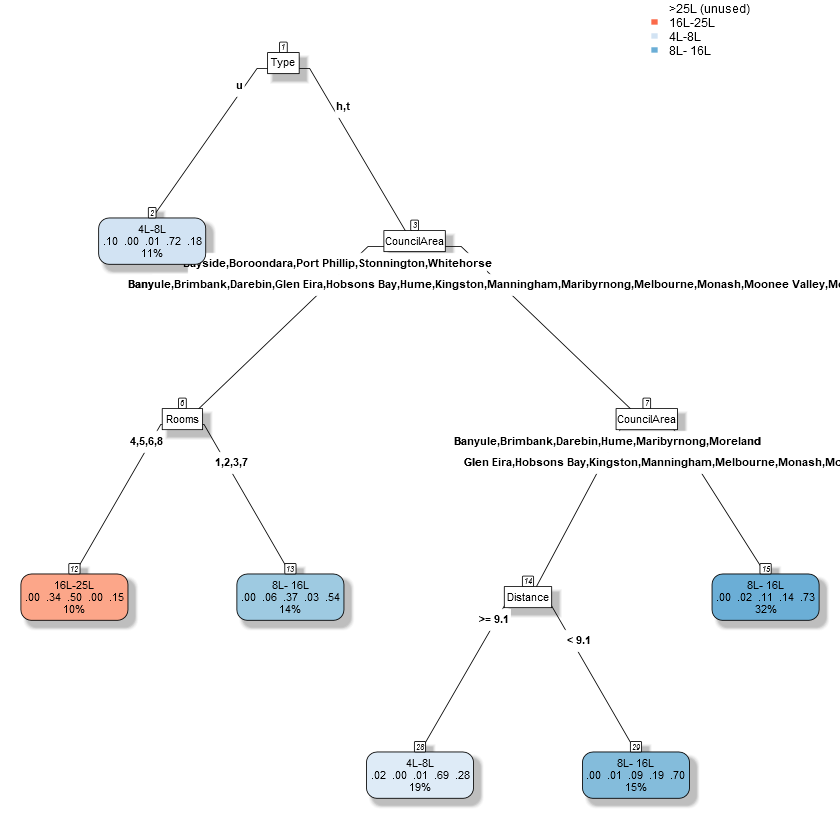

In [26]:
# Plotting Price.bucket using rpart #
rpart.plot::rpart.plot(re.tree.pb, type = 5, box.palette="RdBu", shadow.col="gray", nn=TRUE, fallen.leaves = FALSE, cex = 0.5)


In [27]:
# Slicing Price.bucket for prediction #
ac.pb<-realestate.tree.pb[,15]
x.pb<-realestate.tree.pb[,-15]
pred.pb<-predict(re.tree.pb,x.pb, type="class")
table(ac.pb,pred.pb)


         pred.pb
ac.pb      <4L >25L 16L-25L 4L-8L 8L- 16L
  <4L        0    0       0   114       8
  >25L       0    0     269     6     135
  16L-25L    0    0     396    26     827
  4L-8L      0    0       1  1728     621
  8L- 16L    0    0     122   603    3360

In [29]:
# Spliting data into training and test #
library(caTools)
set.seed(23)
split.re.pb = sample.split(realestate.tree.pb$Price.bucket, SplitRatio = 0.7)
training.re.pb = subset(realestate.tree.pb, split.re.pb == TRUE)
test.re.pb = subset(realestate.tree.pb, split.re.pb == FALSE)

In [30]:
# Applying D.Tree on Training Dataset for Price.bucket #
tr.tree.pb<-re.tree.pb<-rpart::rpart(Price.bucket ~ Rooms+Type+Landsize+Bathroom+CouncilArea+Distance, data = training.re.pb, control = rpart.control(minsplit = 20, cp = 0.01,maxcompete = 4, xval = 10, surrogatestyle = 0, maxdepth = 30),method="class")

In [31]:
# Slicing Price.bucket for prediction on TestData #
ac.test.pb<-test.re.pb[,15]
x.test.pb<-test.re.pb[,-15]
pred.test.pb<-predict(tr.tree.pb,x.test.pb,type="class")
table(ac.test.pb,pred.test.pb)

          pred.test.pb
ac.test.pb  <4L >25L 16L-25L 4L-8L 8L- 16L
   <4L        0    0       0    33       4
   >25L       0    0      87     0      36
   16L-25L    0    0     115     8     252
   4L-8L      0    0       1   517     187
   8L- 16L    0    0      46   171    1008